In [5]:
# importing necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D, RandomZoom, RandomRotation, RandomFlip, RandomContrast
from tensorflow.keras import Model, regularizers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img, image_dataset_from_directory
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers.experimental import preprocessing

import matplotlib.pyplot as plt
import os
import imghdr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from PIL import Image
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split


C:\Users\kpegg\AppData\Local\Temp\ipykernel_13600\1979840376.py:16: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
train = "../data/dog-breed-identification/train"
test = "../data/dog-breed-identification/test"
df=pd.read_csv("../data/dog-breed-identification/labels.csv")
df.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [7]:
labels = df["breed"].unique().tolist()

In [8]:
# add '.jpg' to id for image_id
df['image_file'] = df['id'].apply(lambda x: x + ".jpg")

In [9]:
# converting images to numpy array
image_size = 100  # Adjust to your desired image size

train_data = np.zeros((len(df), image_size, image_size, 3), dtype="float32")

for i, img_id in enumerate(df["image_file"]):
    img_path = os.path.join(train, img_id)
    img = Image.open(img_path)
    
    # Resize the image
    img = img.resize((image_size, image_size))
    
    # Convert to array with preprocessing
    img_array = np.array(img)/255
    
    # Convert to array and preprocess
    #img_array = preprocess_input(np.expand_dims(np.array(img), axis=0))
    
    train_data[i] = img_array

In [10]:
# instantiate LabelEncoder
encoder = LabelEncoder()

# fit & transform encoder on to label_data
label_data = encoder.fit_transform(df["breed"].values)

In [11]:
X = train_data
y = label_data

# # split into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

In [13]:
# adding a data augmentation layer
data_aug = Sequential([                                    
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomContrast(0.2)                                  
], name='data_augmentation')

In [14]:
model6 = Sequential(
    data_aug
)

# Add Convolutional layers with dropout
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), 
                  kernel_regularizer=regularizers.l2(0.01) # Adding L2 regularizer
                  ))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))  # Add dropout after the first convolutional layer

model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers for classification
model6.add(Flatten())
model6.add(Dense(256, activation='relu'))  # Increase the number of nodes in this dense layer
model6.add(Dense(128, activation='relu'))
model6.add(Dense(120, activation='softmax'))  # 120 output classes

# Compile the model
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
sixth = model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50


128/128 [==============================] - 69s 526ms/step - loss: 4.8172 - accuracy: 0.0103 - val_loss: 4.7955 - val_accuracy: 0.0117
Epoch 2/50
128/128 [==============================] - 65s 505ms/step - loss: 4.7702 - accuracy: 0.0128 - val_loss: 4.7047 - val_accuracy: 0.0181
Epoch 3/50
128/128 [==============================] - 58s 450ms/step - loss: 4.6340 - accuracy: 0.0201 - val_loss: 4.5825 - val_accuracy: 0.0166
Epoch 4/50
128/128 [==============================] - 57s 443ms/step - loss: 4.5522 - accuracy: 0.0267 - val_loss: 4.5084 - val_accuracy: 0.0347
Epoch 5/50
128/128 [==============================] - 57s 442ms/step - loss: 4.4301 - accuracy: 0.0352 - val_loss: 4.4098 - val_accuracy: 0.0362
Epoch 6/50
128/128 [==============================] - 56s 439ms/step - loss: 4.3510 - accuracy: 0.0411 - val_loss: 4.3887 - val_accuracy: 0.0381
Epoch 7/50
128/128 [==============================] - 59s 461ms/step - loss: 4.2778 - accuracy: 0.0497 - val_loss: 4.2902 - val_

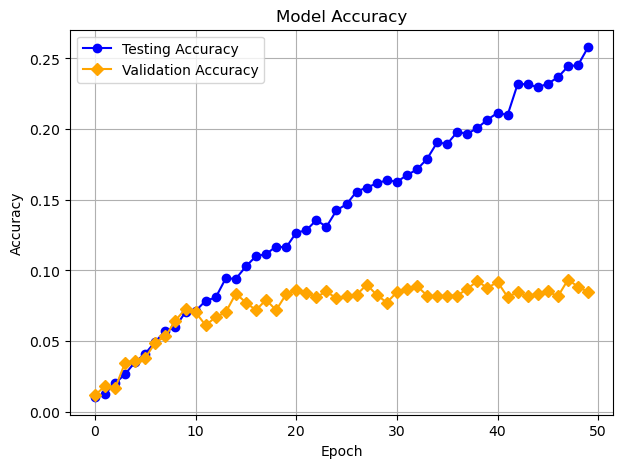

In [16]:
# graph of accuracy of training & validation data
plt.figure(figsize=(7,5))
plt.plot(sixth.history['accuracy'],label="Testing Accuracy",color="blue",marker="o")
plt.plot(sixth.history['val_accuracy'],label="Validation Accuracy",color="orange",marker="D")
plt.grid(True)
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [19]:
sixth_2 = model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

Epoch 1/100
128/128 [==============================] - 59s 460ms/step - loss: 2.9774 - accuracy: 0.2557 - val_loss: 4.4314 - val_accuracy: 0.0924
Epoch 2/100
128/128 [==============================] - 62s 488ms/step - loss: 2.9487 - accuracy: 0.2552 - val_loss: 4.5294 - val_accuracy: 0.0910
Epoch 3/100
128/128 [==============================] - 66s 516ms/step - loss: 2.9115 - accuracy: 0.2683 - val_loss: 4.5371 - val_accuracy: 0.0870
Epoch 4/100
128/128 [==============================] - 64s 501ms/step - loss: 2.8990 - accuracy: 0.2687 - val_loss: 4.6217 - val_accuracy: 0.0910
Epoch 5/100
128/128 [==============================] - 58s 455ms/step - loss: 2.8671 - accuracy: 0.2768 - val_loss: 4.6917 - val_accuracy: 0.0792
Epoch 6/100
128/128 [==============================] - 56s 440ms/step - loss: 2.8432 - accuracy: 0.2804 - val_loss: 4.6834 - val_accuracy: 0.0875
Epoch 7/100
128/128 [==============================] - 58s 456ms/step - loss: 2.8461 - accuracy: 0.2712 - val_loss: 4.6428 -

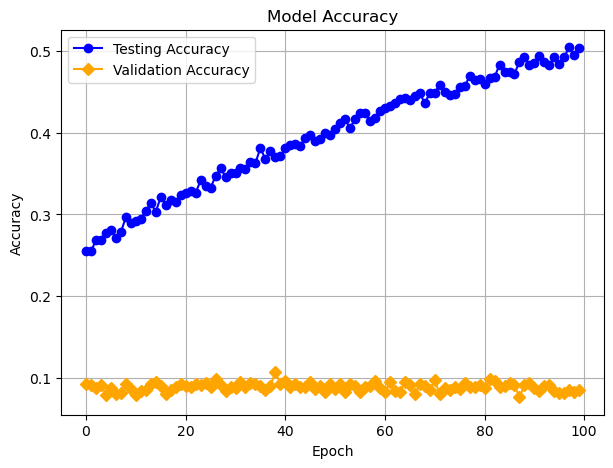

In [20]:
# graph of accuracy of training & validation data
plt.figure(figsize=(7,5))
plt.plot(sixth_2.history['accuracy'],label="Testing Accuracy",color="blue",marker="o")
plt.plot(sixth_2.history['val_accuracy'],label="Validation Accuracy",color="orange",marker="D")
plt.grid(True)
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

1/1 [==============================] - 0s 39ms/step


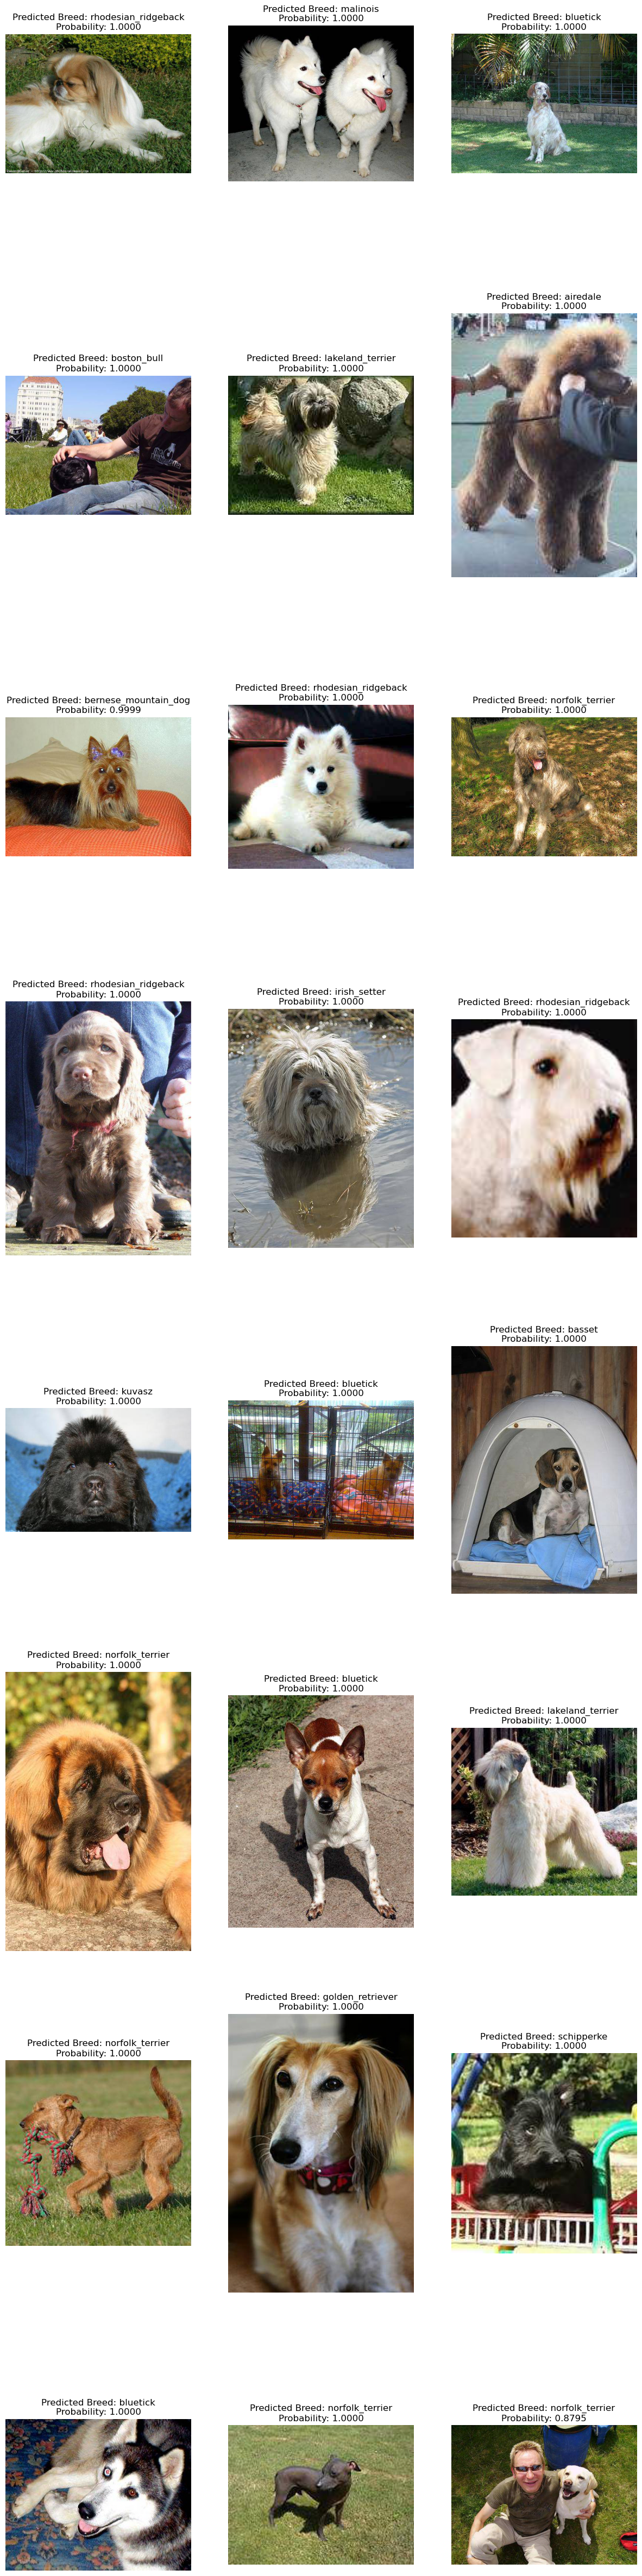

In [22]:
# Predict on test images and map predicted class indices to breed names
predicted_breeds = []
for image_filename in os.listdir(test):
    image_path = os.path.join(test, image_filename)
    img_array = preprocess_image(image_path, 100)  # Assuming image size is 100x100
    predictions = model6.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_breed = df.iloc[predicted_class_index]["breed"]
    predicted_probability = np.max(predictions)
    predicted_breeds.append((image_filename, predicted_breed, predicted_probability))

# Display images along with predicted breed
num_images_to_display = 24  # Change this to display more or fewer images
num_rows = (num_images_to_display + 3 - 1) // 3

plt.figure(figsize=(15, 8 * num_rows))
for i, (image_filename, predicted_breed, predicted_probability) in enumerate(predicted_breeds[:num_images_to_display]):
    image_path = os.path.join(test, image_filename)
    img = Image.open(image_path)

    row = i // 3
    col = i % 3

    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted Breed: {predicted_breed}\nProbability: {predicted_probability:.4f}")
    plt.axis("off")

1/1 [==============================] - 0s 21ms/step


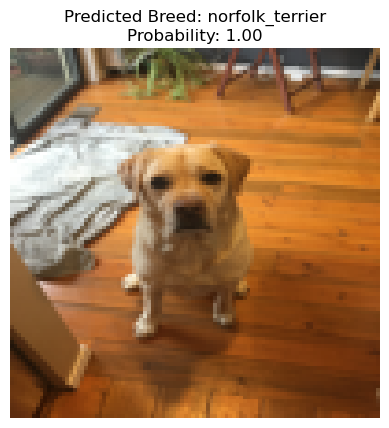

In [24]:
# Function to preprocess the image
def preprocess_image(image_path, image_size):
    img = Image.open(image_path)
    img = img.resize((image_size, image_size))
    img_array = np.array(img) #/ 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path of the image to be predicted
image_path = r"C:\Users\kpegg\Documents\Flatiron\Projects\05_Nose_Knows\data\IMG_6753.jpg"

# Preprocess the image
preprocessed_img = preprocess_image(image_path, 100)  # Assuming image size is 100x100

# Rotate the image
img_rotated = Image.open(image_path).rotate(270, expand=True)
img_rotated = img_rotated.resize((100, 100))  # Resize after rotation

# Preprocess the rotated image
preprocessed_rotated_img = np.array(img_rotated) #/ 255.0  # Normalize pixel values
preprocessed_rotated_img = np.expand_dims(preprocessed_rotated_img, axis=0)  # Add batch dimension

# Use the pre-trained model to predict the breed
predictions = model6.predict(preprocessed_rotated_img)
predicted_class_index = np.argmax(predictions)
predicted_breed = df.iloc[predicted_class_index]["breed"]
predicted_probability = predictions[0][predicted_class_index]  # Probability of the predicted class

# Display the image
plt.imshow(img_rotated)
plt.title(f"Predicted Breed: {predicted_breed}\nProbability: {predicted_probability:.2f}")
plt.axis("off")
plt.show()

In [25]:
sixth_3 = model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32)

Epoch 1/500
256/256 [==============================] - 37s 144ms/step - loss: 2.1211 - accuracy: 0.4229 - val_loss: 5.7392 - val_accuracy: 0.0885
Epoch 2/500
256/256 [==============================] - 41s 161ms/step - loss: 2.1089 - accuracy: 0.4335 - val_loss: 5.7811 - val_accuracy: 0.0846
Epoch 3/500
256/256 [==============================] - 43s 166ms/step - loss: 2.0627 - accuracy: 0.4458 - val_loss: 6.0507 - val_accuracy: 0.0831
Epoch 4/500
256/256 [==============================] - 47s 182ms/step - loss: 2.0415 - accuracy: 0.4493 - val_loss: 5.7675 - val_accuracy: 0.0817
Epoch 5/500
256/256 [==============================] - 59s 231ms/step - loss: 1.9984 - accuracy: 0.4621 - val_loss: 5.8087 - val_accuracy: 0.0890
Epoch 6/500
256/256 [==============================] - 65s 254ms/step - loss: 1.9742 - accuracy: 0.4661 - val_loss: 5.8481 - val_accuracy: 0.0866
Epoch 7/500
256/256 [==============================] - 65s 253ms/step - loss: 1.9961 - accuracy: 0.4558 - val_loss: 5.9762 -

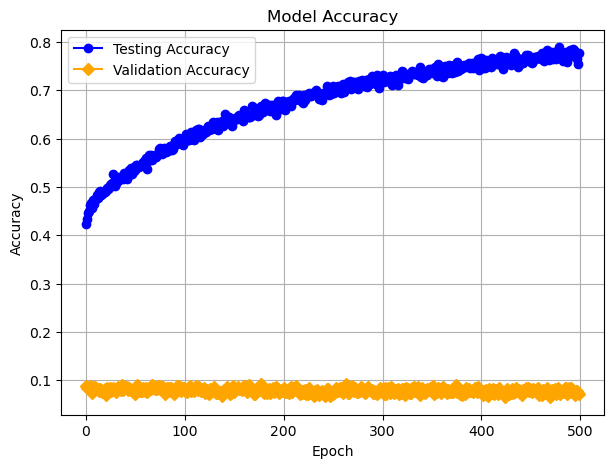

In [26]:
# graph of accuracy of training & validation data
plt.figure(figsize=(7,5))
plt.plot(sixth_3.history['accuracy'],label="Testing Accuracy",color="blue",marker="o")
plt.plot(sixth_3.history['val_accuracy'],label="Validation Accuracy",color="orange",marker="D")
plt.grid(True)
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()